# + Libraries needed

In [84]:
import pandas as pd
from scipy import stats
import seaborn as sb
sb.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [11.7, 8.27]})

# + Load dataframe

In [85]:
df = pd.read_excel('./Grupo 01.xlsx')

# + Quantitative Measures

## - Center's measurement

In [86]:
variables = ['precio','mt2','estrato','alcobas','banos','administracion','avaluo']

var_media = [round(df[i].mean(),2) for i in variables]
var_mediana = [round(df[i].median(),2) for i in variables]
var_mode = [round(df[i].mode(),2) for i in variables]
var_media_geo = [round(stats.gmean(df[i]),2) for i in variables]
var_media_arm = [round(stats.hmean(df[i]),2) for i in variables]

df_variables = pd.DataFrame(var_media)
df_variables.columns = ['Media']
df_variables['Mediana'] = var_mediana
df_variables['Moda'] = var_mode
df_variables['Media_geometrica'] = var_media_geo
df_variables['Media_armonica'] = var_media_arm

g:\my drive\universidad\pye\projects\venv\lib\site-packages\scipy\stats\_stats_py.py:279: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


### - Charts

In [87]:
# sb.histplot(data=df,x='precio',hue='parqueadero').set_title("Rangos de precios")
# sb.histplot(data=df,x='mt2').set_title("Metros cuadrados")
# sb.catplot(data=df,x='estrato',y='alcobas',kind='bar',ci=None).set(title="Numero de alcobas por estrato")
# sb.catplot(data=df,x='alcobas',y='precio',kind='bar',ci=None).set(title="Precios segun el numero de alcobas")
# sb.barplot(x='banos',y='estrato',data=df,ci=None).set_title("Número de baños  según el estrato socioeconómico ")
# sb.histplot(data=df,x='administracion').set_title("Rango de precios por servicio de administración ")
#sb.scatterplot(x='avaluo',y='precio',data=df,hue='estrato').set_title("Avaluo de los apartamentos vs sus precios de venta y estrato al que pertencen")

## - Scattering's Measurement

In [88]:
def fill_dataframes (string_names,dict_names):
    df_output = pd.DataFrame()
    for i in string_names:
        df_output[i] = dict_names[i]
    return df_output

Function to fill dataframes using data-structures to stored.

In [89]:
var_std = [round(df[i].std(),2) for i in variables]
var_min = [df[i].min() for i in variables]
var_max = [df[i].max() for i in variables]
var_q1 = [round(df[i].quantile(q=0.25),2) for i in variables]
var_q3 = [round(df[i].quantile(q=0.75),2) for i in variables]
var_var = [round(df[i].var(),2) for i in variables]
var_asi = [round(df[i].skew(),2) for i in variables]
var_kur = [round(stats.kurtosis(df[i], fisher=True),2) for i in variables]
var_range = [df[i].max() - df[i].min() for i in variables]

scattering = {
    'std': var_std,
    'min': var_min,
    'max': var_max,
    'q1': var_q1,
    'q3': var_q3,
    'var': var_var,
    'asi': var_asi,
    'kur': var_kur,
    'range': var_range,
}
scattering_columns = ['std','min','max','q1','q3','var','asi','kur','range']

df_sct = fill_dataframes(scattering_columns, scattering)

# + Qualitative Measures

In [90]:
def get_acum (dataframe,option):
    """Funcion que llena un arreglo <storaged> con los valores acumulados
       de la suma de cada elemento dentro del <dataframe>
    """
    acum = 0
    storaged = []

    if option == 1: #opcion para obtener la frecuncia absoluta
       values = dataframe['Frecuencia_absoluta'].values

       for i in values:
            acum = acum + i
            storaged.append(acum)

       dataframe['Frec_absoluta_acumulada'] = storaged

    elif option == 2: #opcion para obtener la frecuencia relativa
        values = dataframe['Frecuencia_relativa'].values

        for i in values:
            acum = acum + i
            storaged.append(acum)

        dataframe['Frec_relativa_acumulada'] = storaged

def get_frec_ab (values):
    """Funcion que retorna un dataframe.
       Se obtiene la frec_ab y se conviente en dataframe.
    """
    frec_ab = values.value_counts()
    frec_df = pd.DataFrame(frec_ab)
    frec_df.columns = ['Frecuencia_absoluta']
    return frec_df

def get_frec_rel (dataframe,source):
    """Funcion que actualiza el parametro <datagrame> anadiendo la columna
       de frec_relativas.
    """
    dataframe['Frecuencia_relativa'] = round(dataframe['Frecuencia_absoluta'] * 100 / len(source),3)


Functions to get absolutes and relatives frequencies

In [91]:
var_ubicacion = df['ubicacion']

'''Frecuencia absoluta'''

frec_ubicacion = get_frec_ab(var_ubicacion)

'''Frecuencia relativa'''

get_frec_rel(frec_ubicacion,var_ubicacion)

'''Frecuencia absoluta acumulada'''
get_acum(frec_ubicacion,1)

'''Frecuencia relativa acumulada'''

get_acum(frec_ubicacion,2)

Getting rel and abs frequencies with the past functions

In [92]:
# var_columna = df['nombre de la columna/variable de mi interes']
#variables_categoricas_disponibles = ['ubicacion','balcon','parqueadero','terminado']

### Charts

In [93]:
# sb.barplot(x='precio',y='ubicacion',data=df,ci=None).set_title("Precios de los departamentos según su ubicación ")
# sb.barplot(x='balcon',y='precio',data=df,ci=None).set_title("Precios de apartamento según si tienen balcón o no.")
# sb.barplot(x='parqueadero',y='precio',data=df,ci=None).set_title("Precios de apartamento según si tiene lugar de parqueo")
# sb.barplot(x='ubicacion',y='mt2',hue='terminado',data=df,ci=None).set_title("Ubicaciones con más apartamentos terminados")

### - Price regarding of parqueadero

In [94]:
def get_cm (datasource,num_variable,qul_variable):
    """

    :param datasource: dataframe from where will be extract it the columns
    :param num_variable: numeric variables used to calculate the center's measurement
    :param qul_variable: qualitative variable used to group the center's measurement
    :return: a dataframe with pretty cm shorter
    """
    try:
        var_filter = datasource[num_variable]
        df = pd.DataFrame()
        df['media'] = var_filter
        df['qualitative_index'] = datasource[qul_variable]
        gb_gateway = round(df.groupby(['qualitative_index']).mean(),2)
        gb_gateway['mediana'] = df.groupby(['qualitative_index']).median().values
        gb_gateway['mode'] = df.groupby(['qualitative_index']).agg(pd.Series.mode).values
        return gb_gateway
    except Exception:
        print(f"Something was wrong while function, {type(Exception.__name__)}")


Function to get central measures

In [95]:
price_parking_cm = get_cm(df,'precio','parqueadero')

### - Mt2 regarding of terminado

In [96]:
mt2_ended_cm = get_cm(df,'mt2','terminado')

### Boxplot charts

Text(0.5, 1.0, 'Medidas de tendecia central de los mt2 segun estado de construccion')

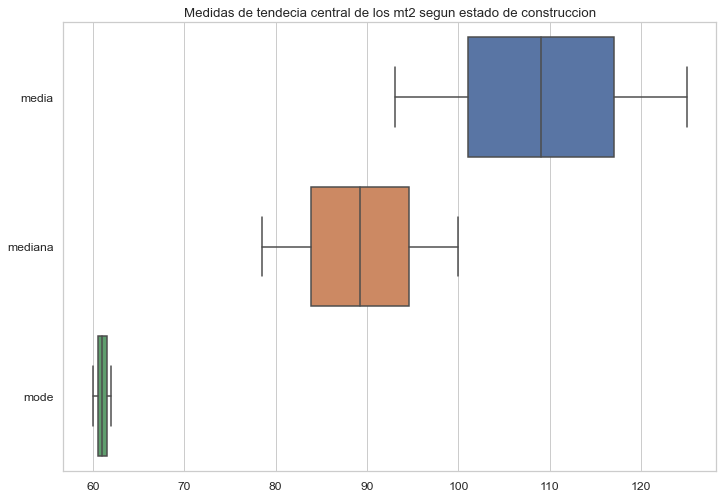

In [99]:
sb.boxplot(data=mt2_ended_cm, orient='h').set_title("Medidas de tendecia central de los mt2 segun estado de construccion")